# Audi used car price prediction 
## Linear Regression with multiple variable

#### Objectives:
- (A) Load the data, 
- (B) Perform Label Encoding or One-hot Encoding and explanation.
- (C) Split the original dataset into the train set (80%) and the test set (20%), 
- (D) Perform Linear Regression and Predict the 'Price' from the test set, 
- (E) Show the coefficients of your linear regression model for each feature and show the y-intercept value of your linear regression model. (Interpret the coefficients)
- (F) Find the MAE, MAPE, MSE, RMSE, coefficient of determination values from the actual target variable and the predicted target variable.
- (G) Compare the actual and predicted target variable through visualization

In [1]:
import pandas as pd
import numpy as np
# to remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')
# to generate clear images
import seaborn as sns
sns.set_context('talk')

## Linear Regression

In [2]:
#load audi car dataset
df=pd.read_csv("audi.csv")
display(df.head())
df.info()
df.shape

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


(10668, 8)

### Encoding
#### one hot encoding- let, DataFrame df


In [3]:
# object type cols
print(len(df['transmission'].unique()))
print(len(df['model'].unique()))
print(len(df['fuelType'].unique()))

3
26
3


In [4]:
df=pd.get_dummies(df,drop_first=True)
df.head()
#df.info()
# column increases to 34, target=1, features=33

,year,price,mileage,mpg,engineSize,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,...,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,55.4,1.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2016,16500,36203,64.2,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2016,11000,29946,55.4,1.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2017,16800,25952,67.3,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,17300,1998,49.6,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


#### Label encoding-let, DataFrame df2

In [5]:
df2=pd.read_csv("audi.csv")
# df2.head()
# df2.info()
# df2.shape
#df2.columns

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# encoding object columns individually
df2['model'] =le.fit_transform(df2['model'])
df2['transmission'] =le.fit_transform(df2['transmission'])
df2['fuelType'] =le.fit_transform(df2['fuelType'])
df2.head()
#df2.info() #- found no object column

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,0,2017,12500,1,15735,2,55.4,1.4
1,5,2016,16500,0,36203,0,64.2,2.0
2,0,2016,11000,1,29946,2,55.4,1.4
3,3,2017,16800,0,25952,0,67.3,2.0
4,2,2019,17300,1,1998,2,49.6,1.0


In [7]:
#This converts object cols to category cols-another method of LE
# df['transmission'] = df['transmission'].astype('category')
# df['fuelType'] = df['fuelType'].astype('category')
# df['model'] = df['model'].astype('category')
# df['year'] = df['year'].astype('category')
# df.head()
# df.info()

### separating variables

In [8]:
print(df.shape) #one hot encoded
print(df2.shape) #label encoded

(10668, 34)
(10668, 8)


In [9]:
#one hot
X=df.drop('price',axis=1)
y=df[['price']]
print(X.shape, y.shape) 


(10668, 33) (10668, 1)


In [10]:
#label
X2=df2.drop('price',axis=1)
y2=df2[['price']]
print(X2.shape, y2.shape) 

(10668, 7) (10668, 1)


### Train-Test Split and Training

#### one hot encoded dataframe-df

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

reg=LinearRegression()
reg=reg.fit(X_train, y_train)

(8534, 33) (2134, 33) (8534, 1) (2134, 1)


#### Label encoded dataframe-df2

In [12]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

reg2=LinearRegression()
reg2=reg2.fit(X2_train, y2_train)

(8534, 7) (2134, 7) (8534, 1) (2134, 1)


### Prediction

In [13]:
#one hot
y_pred=reg.predict(X_test)
#y_pred

In [14]:
#label
y2_pred=reg2.predict(X2_test)
#y2_pred

### Calculate Coefficients
##### equation: Y=M1.X1+M2.X2+M3.X3+.....+Mn.Xn

In [15]:
#one hot encoded
#np.squeeze() to make coeffients  from two dimention to one dimention

coef=np.squeeze(reg.coef_)  #valus of m for each x(M1,M2...Mn)
features=X.columns
intercept=reg.intercept_  #value of c

#show coefficients in  a dataframe
coefficients=pd.DataFrame({'features':features,'coefficients':coef})
display(coefficients.head())
print('intercept c=' ,intercept)
display(coefficients.shape)

,features,coefficients
0,year,2024.262731
1,mileage,-0.076096
2,mpg,-169.246070
3,engineSize,4253.973799
4,model_ A2,22578.949107


intercept c= [-4060707.74307609]


(33, 2)

<b> Some observations: </b>
- " mileage, mpg, transmission_Manual, fuelType_Petrol " -4 features has negative correlation with the target variable 'price'.
- A positive sign indicates that as the feature variable increases, the target variable also increases.
- A negative sign indicates that as the feature variable increases, the target variable decreases.

In [16]:
#label encoded

coef2=np.squeeze(reg2.coef_)  #valus of m for each x(M1,M2...Mn)
features2=X2.columns
intercept2=reg2.intercept_  #value of c

#show coefficients in  a dataframe
coefficients2=pd.DataFrame({'features':features2,'coefficients':coef2})
display(coefficients2)
print('intercept c=' ,intercept2)
display(coefficients2.shape)

,features,coefficients
0,model,249.062882
1,year,2209.565042
2,transmission,-119.207677
3,mileage,-0.091693
4,fuelType,556.012041
5,mpg,-105.949541
6,engineSize,10516.296006


intercept c= [-4448578.89323968]


(7, 2)

<b> Some observations: </b>
- ' mileage, mpg, transmission'-3 features has negative correlation with the target variable 'price'.
- A positive sign indicates that as the feature variable increases, the target variable also increases.
- A negative sign indicates that as the feature variable increases, the target variable decreases.

### Accuracy

In [17]:
# for one hot encoding
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred) 
RMSE=mean_squared_error(y_test,y_pred,squared=False) 
r_squared=r2_score(y_test, y_pred)
print('using one hot encoding\n')
print("MAE:",MAE)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("r_squared:",r_squared)

using one hot encoding

MAE: 2720.0875685995056
MSE: 17229727.46218702
RMSE: 4150.870687239849
r_squared: 0.885993617548735


In [18]:
# for label encoding

MAE2=mean_absolute_error(y2_test,y2_pred)
MSE2=mean_squared_error(y2_test,y2_pred)
RMSE2=mean_squared_error(y2_test,y2_pred,squared=False)
r_squared2=r2_score(y2_test, y2_pred)
print('using label encoding\n')
print("MAE:",MAE2)
print("MSE:",MSE2)
print("RMSE:",RMSE2)
print("r_squared:",r_squared2)

using label encoding

MAE: 3534.985036771406
MSE: 31682403.997014146
RMSE: 5628.712463522555
r_squared: 0.7903625420085083


<b>observation: </b> 
- comparing MAE,MSE,RMSE,Rsquared values- one hot encoding seems better than Label encoding on audi car dataset.

### Visualization
#### for one hot encoded

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
display(y_test.shape[0]) #0 means row number 
display(y_test.shape[1]) #1 means col number

2134

1

In [20]:
#add with y_test dataframe
y_test['predicted price'] = y_pred
y_test['x']=np.arange(0,y_test.shape[0],1) #from 0 to col number of y_test with step of 1

y_test.tail() #require warning filter

,price,predicted price,x
8606,31450,29729.178210,2129
8977,12900,15797.205062,2130
3673,16750,16285.063137,2131
1034,21996,24273.501787,2132
6867,9547,10427.251040,2133


<AxesSubplot:xlabel='x', ylabel='price'>

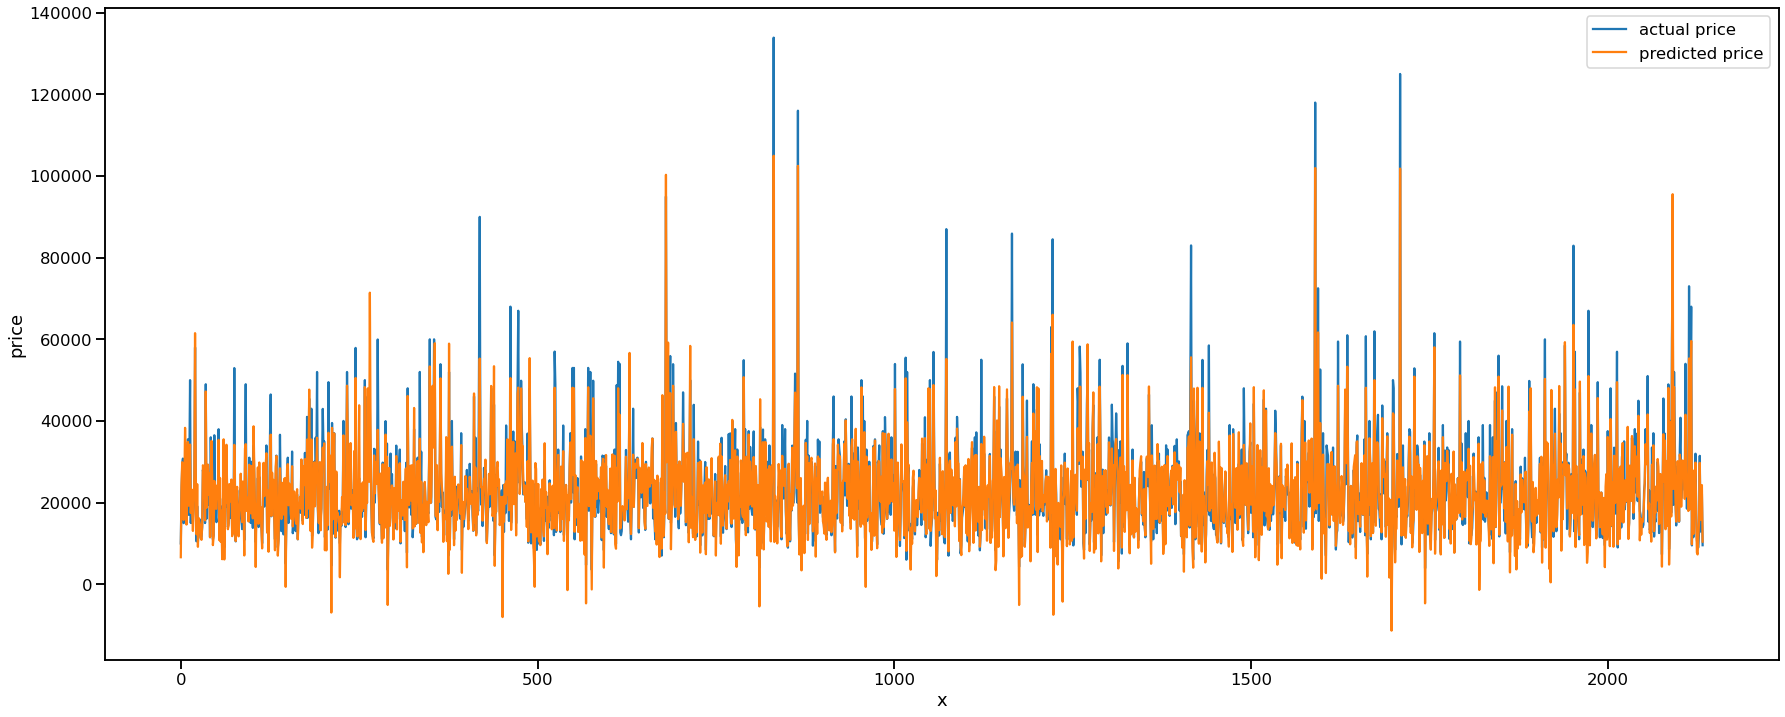

In [21]:
plt.figure(figsize=(30,12))


sns.lineplot(x='x' ,y='price' ,data=y_test, label='actual price')
sns.lineplot(x='x' ,y='predicted price' ,data= y_test, label='predicted price')

<AxesSubplot:xlabel='price', ylabel='predicted price'>

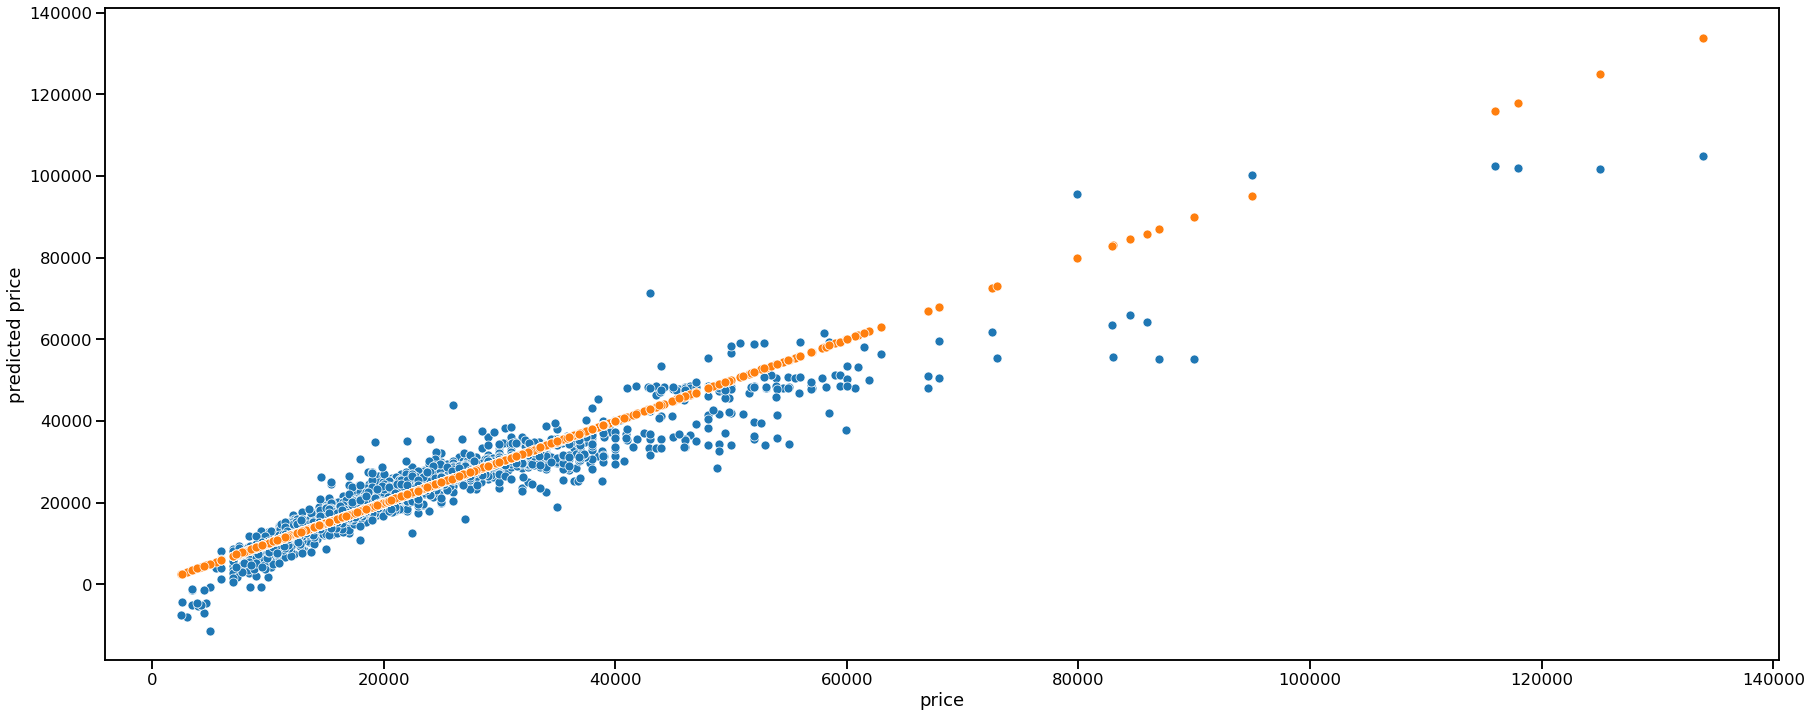

In [22]:
plt.figure(figsize=(30,12))
sns.scatterplot(x='price', y='predicted price',data=y_test) 
sns.scatterplot(x='price', y='price',data=y_test) #best fit line


<b> Some observations: </b>
- some predicted price is negative with is not possible.
- predicted price almost follows the best fit line between 6000 to almost 40000 dollar.
- after 60000 dollars, error is significant,most predicted values are less than actual values.

#### for label encoded

In [23]:
y2_test['predicted price'] = y2_pred
y2_test['x']=np.arange(0,y2_test.shape[0],1) #from 0 to col number of y_test

y2_test.head() #require warning filter

,price,predicted price,x
10442,9990,7534.108400,0
2907,22382,23893.063058,1
7388,28990,28855.582739,2
3016,30777,26856.399464,3
7890,14950,14903.997504,4


<AxesSubplot:xlabel='x', ylabel='price'>

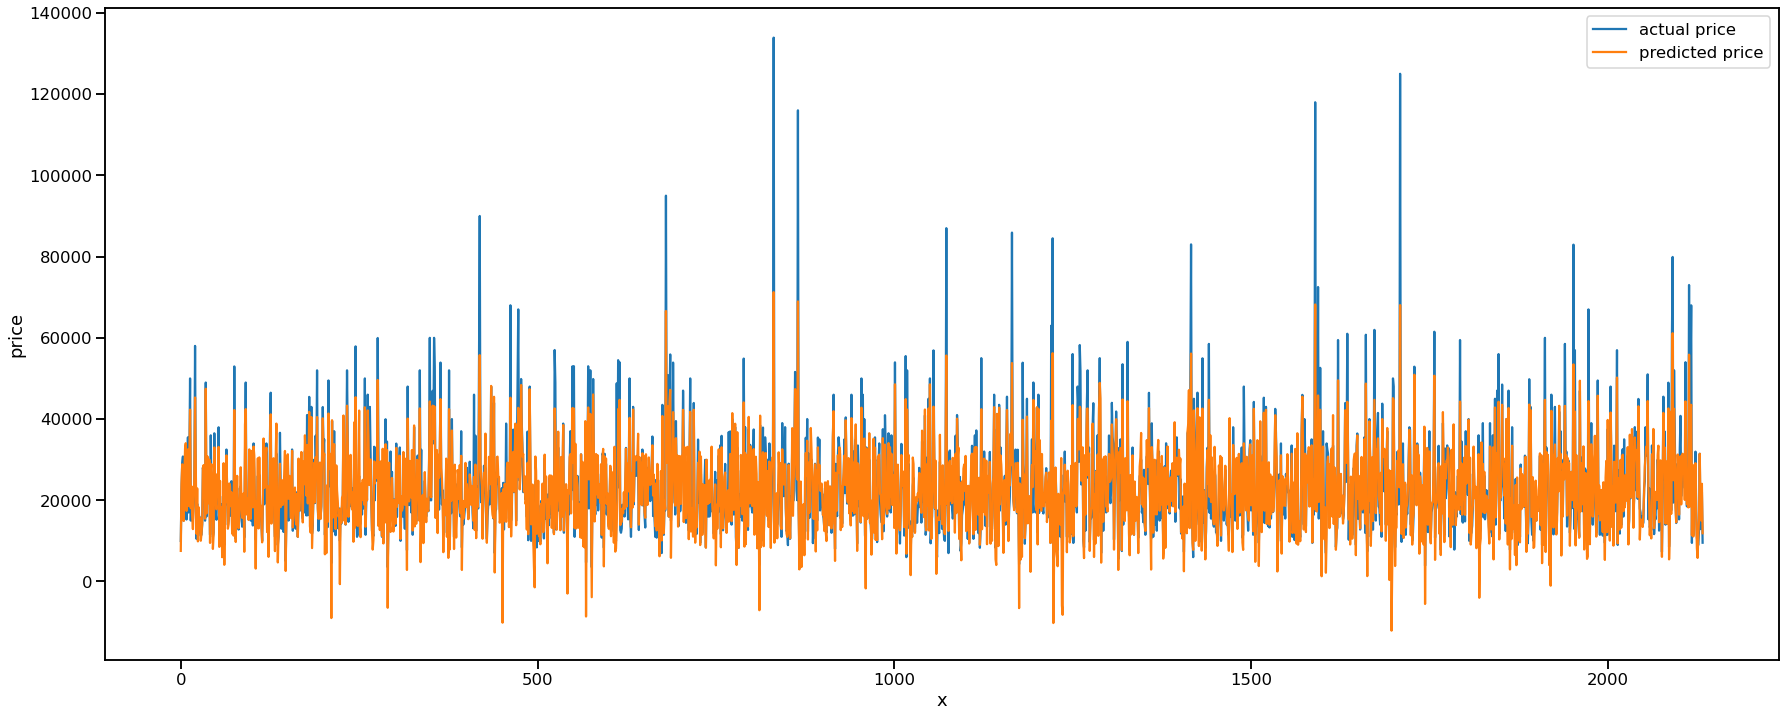

In [24]:
plt.figure(figsize=(30,12))


sns.lineplot(x='x' ,y='price' ,data=y2_test, label='actual price')
sns.lineplot(x='x' ,y='predicted price' ,data= y2_test, label='predicted price')

<AxesSubplot:xlabel='price', ylabel='predicted price'>

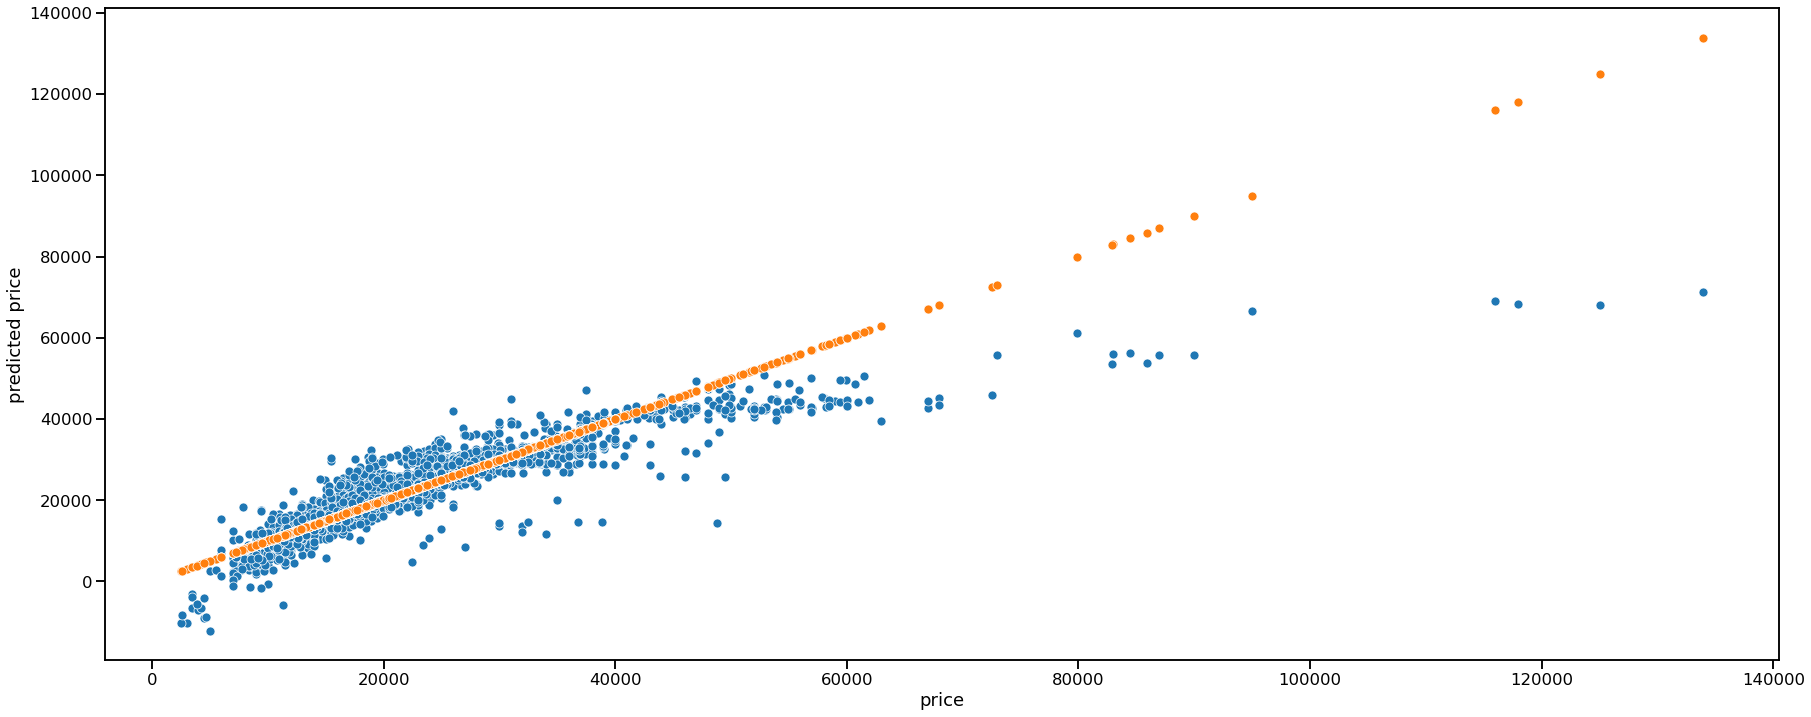

In [25]:
plt.figure(figsize=(30,12))
sns.scatterplot(x='price', y='predicted price',data=y2_test)
sns.scatterplot(x='price', y='price',data=y2_test)


<b> Some observations for Label Encoded: </b>
- some predicted price is negative with is not possible 
- predicted price almost follows the best fit line between 4000 to almost 35000 dollar.
- after 42000 dollars, error is significant,after 50000 dollars, all predicted values are less than actual values.
- although both model shows some errors, one hot encoder performs better than label encoder on this dataset.
- need further pre processing to increase the accuracy.